# Fashion MNIST

A MNIST-like dataset for fashion items. 
See the [original repository](https://github.com/zalandoresearch/fashion-mnist) for more information and visualization examples.

## Import Core Libraries and Specify Keras Backend

First, we'll import some core libraries and some helper functions. Also note that we are updating the `KERAS_BACKEND` variable to point to `CNTK` rather than `TensorFlow` or `Theano`. This is a convenient way of doing this interactively in a single session. If you'd like to make this your default, modify the `~/.keras/keras.json` file to always point to CNTK.

In [1]:
import os
os.environ['KERAS_BACKEND'] = "cntk"

import sys
import urllib

from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from keras.models import Sequential
from keras.utils import to_categorical

from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers
from keras import losses

from fashion_import import load_data

import numpy as np
from PIL import Image
from io import BytesIO

Using CNTK backend


## Downloading Fashion Dataset

The Fashion dataset is not yet preloaded into Keras. We have a simple helper function called `load_data` which will load the data into memory for us.

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

3260416/4422102 [=====================>........] - ETA: 0s

## Scale Data and Visualize

Now that we have our data ingested into memory, let's scale it into unit range and visualize a few examples.

In [3]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

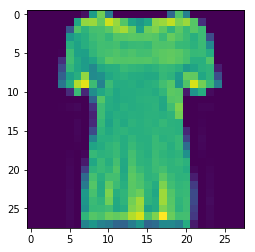

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
pixels = x_train[10].reshape((28, 28))
plt.imshow(pixels)
plt.show()

## Create Network Architecture and Model Parameters

Keras has a very simple high-level sequential and functional API for defining network architectures. Here we'll use the sequential API and compile our model with a common optimization algorithm and loss metrics.

In [5]:
batch_size = 256
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

## Training Our Model

Training the model, i.e., backpropagating to fit model parameters to training data, is as simple as using the `fit` method in Keras.

In [6]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/10


/home/mugen/.conda/envs/cntk-py35/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input170") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


60000/60000 [==============================] - 10s - loss: 0.8519 - acc: 0.6817    
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.5029 - acc: 0.8138     
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.4330 - acc: 0.8406     
Epoch 4/10
60000/60000 [==============================] - 7s - loss: 0.3867 - acc: 0.8575     
Epoch 5/10
60000/60000 [==============================] - 7s - loss: 0.3595 - acc: 0.8675     
Epoch 6/10
60000/60000 [==============================] - 7s - loss: 0.3365 - acc: 0.8777     
Epoch 7/10
60000/60000 [==============================] - 7s - loss: 0.3203 - acc: 0.8822     
Epoch 8/10
60000/60000 [==============================] - 7s - loss: 0.3112 - acc: 0.8868     
Epoch 9/10
60000/60000 [==============================] - 7s - loss: 0.3001 - acc: 0.8896     
Epoch 10/10
60000/60000 [==============================] - 7s - loss: 0.2889 - acc: 0.8936     


## Scoring the Model

Just as simple is scoring it on our test set. We can simply pass the `x_test` and `y_test` arrays to the `evaluate` method and Keras will score the model for us.

In [7]:
test_val = model.evaluate(x_test, y_test)

 1312/10000 [==>...........................] - ETA: 1s

/anaconda/envs/cntk-22/lib/python3.5/site-packages/cntk/core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input170") expects "<class 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


 9856/10000 [============================>.] - ETA: 0s

In [8]:
print("Model's Accuracy on Test Set = "
      + "{0:.2f}%".format(test_val[1] * 100))

Model's Accuracy on Test Set = 90.14%


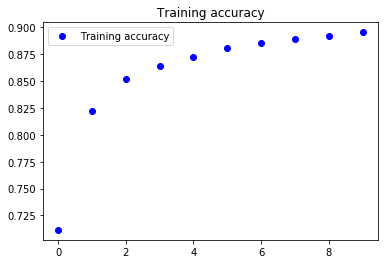

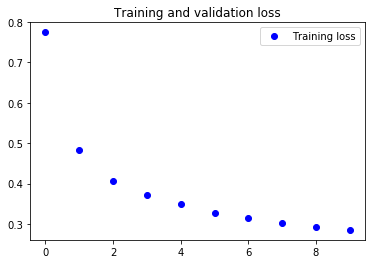

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history.history['acc']
# val_accuracy = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.title('Training accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training loss')
plt.legend()
plt.show()

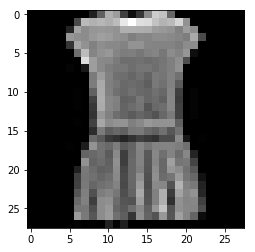

In [11]:
test_im = x_train[3]
plt.imshow(test_im.reshape(28,28), cmap='gray', interpolation='none')
plt.show()

/anaconda/envs/cntk-22/lib/python3.5/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[Composite..., inputs=Input('con...)`
  app.launch_new_instance()


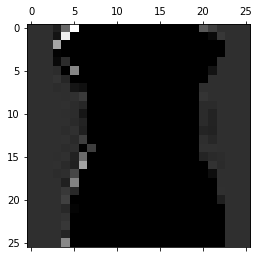

In [12]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1,28,28,1))

first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='gray')

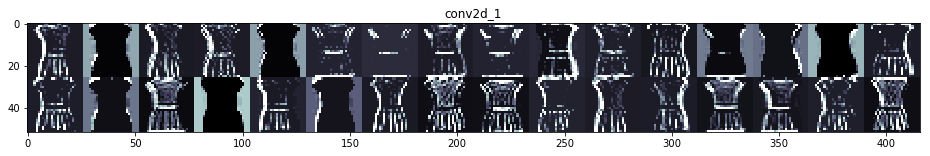

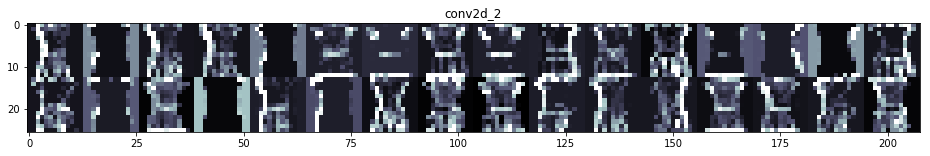

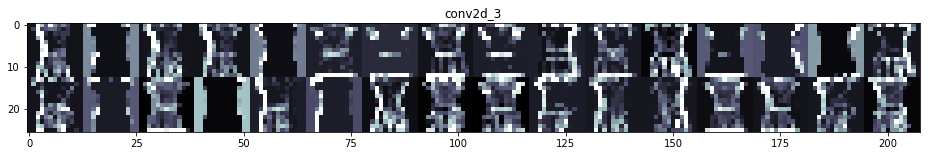

In [13]:
layer_names = []
for layer in model.layers[:-1]:
    if isinstance(layer, Conv2D):
        layer_names.append(layer.name)
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features / images_per_row
    n_cols = int(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')